In [46]:
import pandas as pd

In [47]:
df=pd.read_csv('twitter_data.csv')

In [48]:
df.sample(25)

,is_Hate,text
11877,Hate,It ain't nothing like chasing money cause you ...
19488,Hate,RT @laken_heavner: What I really want is some ...
16329,2,RT @MAfreedom: If you dont see the connection ...
22324,Hate,Type of nicca owe yu money but still ask you t...
12903,Hate,Morning terror read: 99% of the ocean's trash ...
11435,non Hate,I've been tryin to tell niggas RT @_nicarrag L...
8225,non Hate,Bullets stick to a nigguh damn liver
22306,Hate,Twitter niggas always want you to have unprote...
11993,Hate,It's winter up this bitch http://t.co/kYYckry6Qk
16875,Hate,RT @Patt_Bentancur: @zzachbarness @AGrisbhy @W...


In [49]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['IS_HATE']=label_encoder.fit_transform(df['is_Hate'])
df['IS_HATE'].unique()

array([6, 7, 0, 1, 2, 4, 3, 5])

In [50]:
df


,is_Hate,text,IS_HATE
0,Hate,!!! RT @mayasolovely: As a woman you shouldn't...,6
1,Hate,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,6
2,Hate,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,6
3,Hate,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,6
4,Hate,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,6
...,...,...,...
24778,Hate,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,6
24779,Hate,"you've gone and broke the wrong heart baby, an...",6
24780,Hate,young buck wanna eat!!.. dat nigguh like I ain...,6
24781,Hate,youu got wild bitches tellin you lies,6


In [51]:
df.isnull().sum()

is_Hate    0
text       0
IS_HATE    0
dtype: int64

<Axes: >

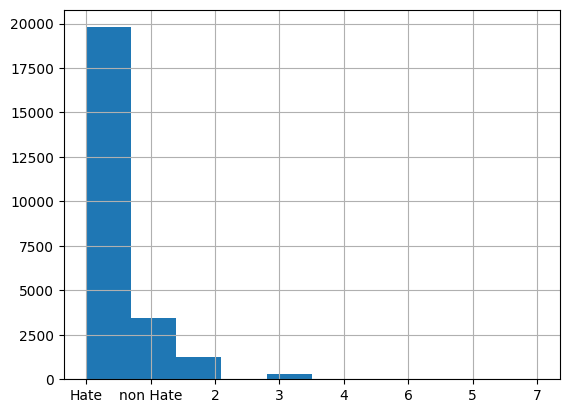

In [52]:
df['is_Hate'].hist()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['IS_HATE'],test_size=0.3,random_state=148,stratify=df['IS_HATE'])

In [55]:
x_train.shape

(17348,)

In [56]:
x_test.shape

(7435,)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X_train=vectorizer.fit_transform(x_train)
X_test=vectorizer.transform(x_test)

In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [59]:
y_pred=mnb.predict(X_test)


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.12      0.00      0.01       375
           1       0.00      0.00      0.00        86
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.81      0.99      0.89      5937
           7       0.33      0.03      0.06      1026

    accuracy                           0.80      7435
   macro avg       0.16      0.13      0.12      7435
weighted avg       0.70      0.80      0.72      7435



C:\Users\hp\Documents\code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\Documents\code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\Documents\code\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7989240080699395

In [62]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))

In [63]:
import matplotlib.pyplot as plt

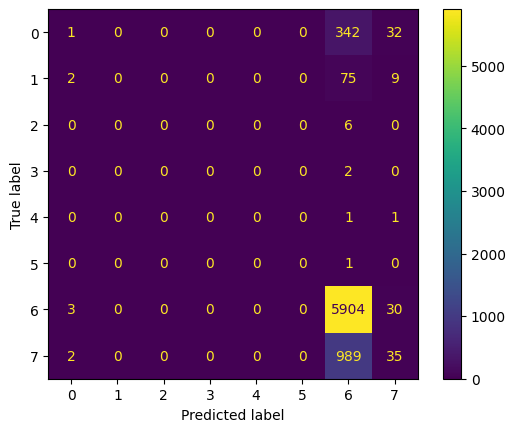

In [64]:
cmd.plot()
plt.show()

In [65]:
def test(comment):
    comment_list=[comment]
    cm=vectorizer.transform(comment_list)
    x=mnb.predict(cm)
    predicted_label= label_encoder.inverse_transform(x)[0]
    return predicted_label

In [97]:
test('u are a stupid hoe')

'Hate'